In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import random
import os
from dotenv import load_dotenv


In [2]:
load_dotenv()
os.environ.get('TRAINING_DIRECTORY')


'F:/big-data/uni/minor-a-systems/cucumber-dataset-compressed/normal-light'

In [3]:
# Set the path to the folders containing the images
# train_dir = './training_data/'
train_dir = os.environ.get('TRAINING_DIRECTORY')

# Define the image size
img_height = 1024
img_width = 1024

# Define the batch size
batch_size = 32


In [4]:
# Read in the images and resize them
classes = ['healthy', 'infected']
images = []
labels = []
img_paths = []
img_dir = f'{train_dir}/mini-healthy'
for img_file in os.listdir(img_dir):
    path = os.path.join(img_dir, img_file)
    img = tf.keras.preprocessing.image.load_img(
        path, target_size=(img_height, img_width))
    img = tf.keras.preprocessing.image.img_to_array(img, dtype=np.uint8)
    images.append(img)
    labels.append(0)
    img_paths.append(path)

img_dir = f'{train_dir}/mini-infected'
for img_file in os.listdir(img_dir):
    path = os.path.join(img_dir, img_file)
    img = tf.keras.preprocessing.image.load_img(
        path, target_size=(img_height, img_width))
    img = tf.keras.preprocessing.image.img_to_array(img, dtype=np.uint8)
    images.append(img)
    labels.append(1)
    img_paths.append(path)

# Convert the data and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)
img_paths = np.array(img_paths)


In [5]:
images.shape

(307, 1024, 1024, 3)

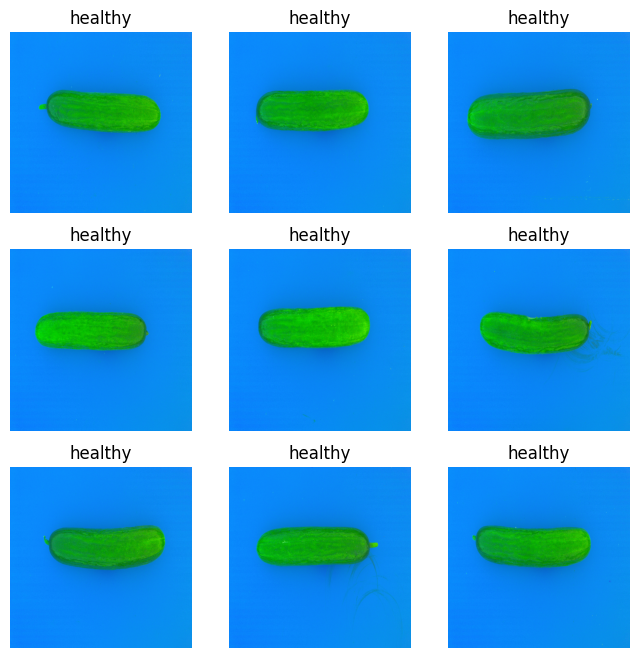

In [6]:
# Plot some images with their labels
plt.figure(figsize=(8, 8))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
    plt.axis('off')


In [7]:
# Get the first y-pixel value where at least 1/64 of the pixels are masked
def get_first_cucumber_pixel(image):
    masked_img = (image[..., 2] < 150)

    first_cucumber_pixel_y = None
    threshold = img_width / 64
    for i in range(masked_img.shape[0]):
        if np.sum(masked_img[i, :]) > threshold:
            first_cucumber_pixel_y = i
            break
    return first_cucumber_pixel_y


In [13]:
# Create the DataFrame

df_records = []
for i in range(images.shape[0]):
    df_records.append({'idx': i, 'label': classes[labels[i]], 'first_cucumber_pixel_y': get_first_cucumber_pixel(images[i])})
    
df = pd.DataFrame(df_records, columns=['idx', 'label', 'first_cucumber_pixel_y'])
    
print(df)

     idx     label  first_cucumber_pixel_y
0      0   healthy                     332
1      1   healthy                     330
2      2   healthy                     326
3      3   healthy                     351
4      4   healthy                     324
..   ...       ...                     ...
302  302  infected                     311
303  303  infected                     311
304  304  infected                     331
305  305  infected                     310
306  306  infected                     348

[307 rows x 3 columns]


## Plot some random images with their label and a line for the first "cucumber pixel" detected

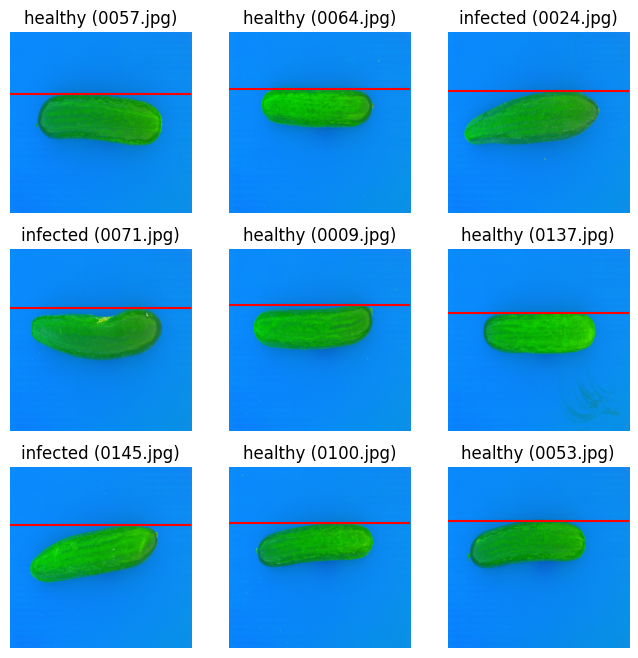

In [16]:
# Plot some random images with their label and a line for the first "cucumber pixel" detected
plt.figure(figsize=(8, 8))
# rand = random.randint(0, images.shape[0] - 10)
for i in range(9):
    rand_idx = random.randint(0, images.shape[0] - 1)
    # rand_idx = rand + i
    ax = plt.subplot(3, 3, i + 1)
    plt.axhline(y=df.iloc[rand_idx]['first_cucumber_pixel_y'], color='r', linestyle='-')
    plt.imshow(images[rand_idx])
    path = img_paths[rand_idx].split(os.sep)[-1]
    plt.title(f'{classes[labels[rand_idx]]} ({path})')
    plt.axis('off')
